# Vegatable Image Classification by CNN
The classification example is implemeted by CNN.

Here is a link of dataset: https://www.kaggle.com/misrakahmed/vegetable-image-dataset

## Content

<ul>
  <li><a href="#part1">1. Import libraries</a></li>
  <li><a href="#part2">2. Define a folder path of test, train and valid and Image Size</a></li>
  <li><a href="#part3">3. Create ImageGenerator for train, test and valid </a></li>
  <li><a href="#part4">4. Create CNN Model </a></li>  
  <li><a href="#part5">5. Compile and Fit CNN Model </a></li>
  <li><a href="#part6">6. Create a Model Loss Graph </a></li>
  <li><a href="#part7">7. Create a Model Accuracy Graph </a></li>
  <li><a href="#part8">8. Load CNN Model as h5 extension file </a></li>
  <li><a href="#part9">9. Define y_test and y_pred values </a></li>
  <li><a href="#part10">10. Draw a confusion matrix through Seaborn library </a></li>
  <li><a href="#part11">11. Show some images to determine if actual value is similar to its predicted value </a></li>  
</ul>

<a id='part1'></a>
## 1 ) Import libraries

In [19]:
#import libraries
import tensorflow 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.models import Model, Sequential
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

<a id='part2'></a>
## 2 ) Define a folder path of test, train and valid and Image Size

In [20]:
MAIN_PATH = "Vegetable Images"
SEPERATOR = "/"
TRAIN_PATH = MAIN_PATH + SEPERATOR + "train"
TEST_PATH =  MAIN_PATH + SEPERATOR + "test"
VALID_PATH = MAIN_PATH + SEPERATOR + "validation"

IMAGE_SIZE = 224

<a id='part3'></a>
## 3 ) Create ImageGenerator for train, test and valid

In [21]:
#Creating generator for Training DataSet
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=64,
        class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
val_generator = val_datagen.flow_from_directory(
        VALID_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical')

#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


<a id='part4'></a>
## 4 ) Create CNN Model

In [22]:
activation = 'relu'

model = Sequential()
model.add(Conv2D(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),filters=32,kernel_size=(3,3),padding="same", activation=activation))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation= activation ))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation= activation ))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation= activation ))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation= activation ))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation= activation ))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation= activation ))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation= activation ))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation= activation ))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(units=512,activation= activation))
model.add(Dense(units=216,activation= activation))
model.add(Dense(units=128,activation= activation))

#Add layers for deep learning prediction
x = model.output  
x = Dense(units= 64, activation = activation, kernel_initializer = 'he_uniform')(x)
x = Dense(units= 32, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(units=15, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
cnn_model = Model(inputs= model.input, outputs=prediction_layer)

<a id='part5'></a>
## 5 ) Compile and Fit CNN Model

In [23]:
class myCallback(Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.97):
                print("\nReached 97% accuracy so cancelling training!")
                self.model.stop_training = True


cnn_model.compile(optimizer=Adam(1e-4), # 0.0001
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

callbacks = myCallback()

history=cnn_model.fit(train_generator,
                  epochs=5,
                  steps_per_epoch = len(train_generator),
                  validation_data=val_generator
                  #callbacks=[callbacks],
                 )

cnn_model.save('model_file.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10_input (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 64)      3692

<a id='part6'></a>
## 6 ) Create a Model Loss Graph

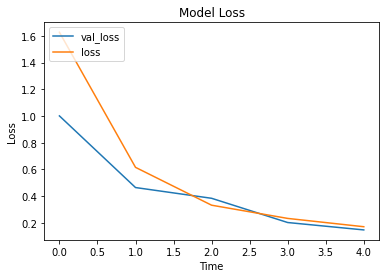

In [24]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

<a id='part7'></a>
## 7 ) Create a Model Accuracy Graph

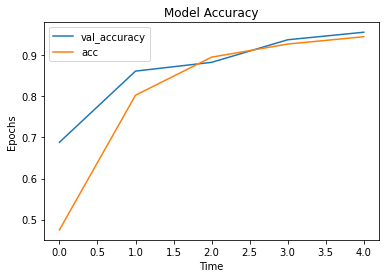

In [25]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

<a id='part8'></a>
## 8 ) Load CNN Model as h5 extension file 

In [26]:
model = load_model('model_file.h5')

<a id='part9'></a>
## 9 ) Define y_test and y_pred values 

In [27]:
n_batches = len(test_generator)

# Predict the label of the test_images
y_test = np.concatenate([np.argmax(test_generator[i][1], axis = 1) for i in range(n_batches)])
y_pred = np.argmax(model.predict_generator(generator=test_generator, steps = n_batches), axis=1)


C:\Users\Noyan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


<a id='part10'></a>
## 10 ) Define the accuracy of test set

In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 95.00%


<a id='part10'></a>
## 10 ) Draw a confusion matrix through Seaborn library

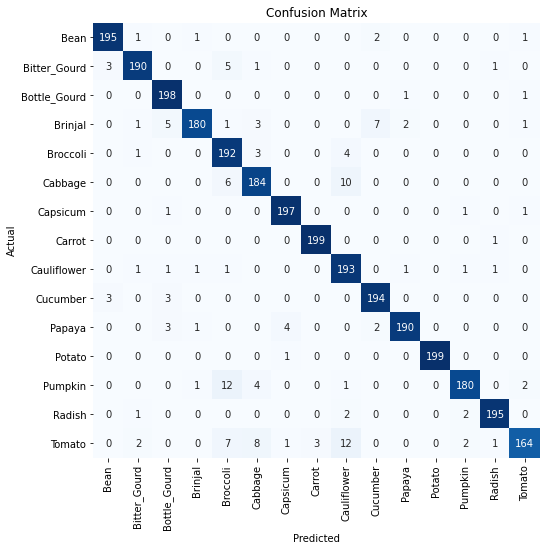

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=np.arange(15))

class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(15) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(15) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<a id='part11'></a>
## 11 ) Show some images to determine if actual value is similar to its predicted value

In [30]:
from keras_preprocessing import image

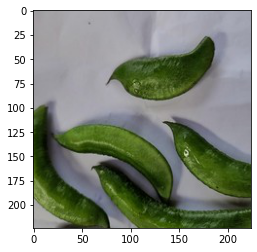

Actual: Bean
Predicted: Bean


In [31]:
image_path="Vegetable Images/test/Bean/0118.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])